In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_geojson as pdg
import json

## Sélection des données à partir des dates 'cadastre-31-parcelles.json.gz'

In [18]:
# lecture et chargement du fichier geojson
geo_path = "C:/Users/marie/Desktop/Enseeiht/3A/BEI/cadastre/cadastre-31-parcelles.json/cadastre-31-parcelles.json"
with open(geo_path, 'r', encoding='utf-8') as file:
    geo_batiments = json.load(file)

### Statistiques sur les données clés à extraire

Nombre de parcelles totales non filtrées : 1341151
Année avec le plus de créations de bâtiments : 2013


Text(0, 0.5, 'Proportion')

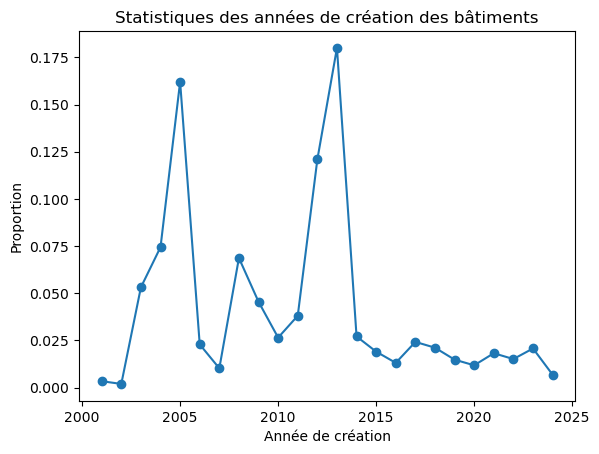

In [32]:
# Stastistiques sur les années de création
created_date = []
for feature in geo_batiments["features"]:
    created_date.append(feature["properties"].get("created"))

nbre_parcelles_init = len(created_date)
print(f"Nombre de parcelles totales non filtrées : {nbre_parcelles_init}")

origin = 2024
max = 2024

for d in created_date:
    split = d.split('-')
    if int(split[0]) < origin:
        origin = int(split[0])

years = np.zeros(max - origin + 1)

for d in created_date:
    split = d.split('-')
    years[int(split[0]) - origin] += 1

years /= np.sum(years)
opt_year = np.argmax(years) + origin

print(f"Année avec le plus de créations de bâtiments : {opt_year}")

plt.plot(range(origin, max + 1), years, 'o-')
plt.title("Statistiques des années de création des bâtiments")
plt.xlabel("Année de création")
plt.ylabel("Proportion")

Surface minimale :  0
Surface maximale :  10020000


Text(0, 0.5, 'Nombre de parcelles')

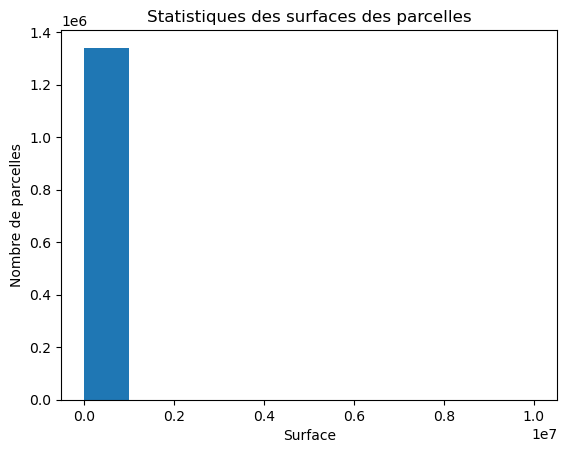

In [48]:
# Statistiques sur les surfaces des parcelles
contenance = []
for feature in geo_batiments["features"]:
    contenance.append(feature["properties"].get("contenance"))

origin = np.inf
max = 0

for c, idx in zip(contenance, range(len(contenance))):
    if c is not None:
        if c < origin:
            origin = c
        if c > max:
            max = c
    else:
        contenance[idx] = 0 # ne fonctionne pas 

print('Surface minimale : ', origin)
print('Surface maximale : ', max)

surface_opt = 1000

plt.figure()
plt.hist(contenance)
plt.title("Statistiques des surfaces des parcelles")
plt.xlabel("Surface")
plt.ylabel("Nombre de parcelles")


### Filtrage des données à partir des statistiques extraites

In [49]:
# Filtrage des dates de création antérieures à une année donnée
temp = []
for d in created_date:
    split = d.split('-')
    temp.append(int(split[0])*366 + int(split[1])*31 + int(split[2]))

filtered_features = []
for feature, d in zip(geo_batiments["features"], temp):
    # 00/00/2020 < date d'extraction
    if d and d > opt_year*366:
        filtered_features.append(feature)

In [50]:
# Filtrage des surfaces de parcelles inférieures à une surface donnée
filtered_features2 = []
for feature, c in zip(filtered_features, contenance):
    if c > surface_opt:
        filtered_features2.append(feature)

### Enregistrement du fichier GeoJSON avec les données filtrées

In [51]:
# Création d'un nouveau fichier GeoJSON
filtered_geojson = {
    "type": "FeatureCollection",
    "features": filtered_features2
}

# Sauvegarde du nouveau fichier GeoJSON
with open("filtered_parcelles.geojson", "w", encoding="utf-8") as f:
    json.dump(filtered_geojson, f, indent=4, ensure_ascii=False)

print(f"Nouveau fichier GeoJSON sauvegardé avec {len(filtered_features2)} parcelles (nombre initial de parcelles : {nbre_parcelles_init}).")

Nouveau fichier GeoJSON sauvegardé avec 338289 parcelles. (nombre initial de parcelles : 1341151)


TO DO :
- obtenir un bon filtrage de la surface des parcelles
- extraire que les coordonnées gps du fichier geojson filtré
- récup des données avec eodag